In [8]:
import yfinance as yf

# Define tickers
tickers = ['TSLA', 'BND', 'SPY']

# Fetch data from January 1, 2015, to January 31, 2025
data = yf.download(tickers, start="2015-01-01", end="2025-01-31")
# Save the data to CSV files
data['Close'].to_csv('../data/adj_close_prices.csv')
data['Volume'].to_csv('../data/volume_data.csv')

print("Data fetched and saved successfully!")
data.head()

[*********************100%***********************]  3 of 3 completed

Data fetched and saved successfully!


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573086  172.592865  14.620667  62.603370  173.811099   
2015-01-05  62.754833  169.475891  14.006000  62.777545  171.702294   
2015-01-06  62.936535  167.879608  14.085333  63.125806  170.316050   
2015-01-07  62.974380  169.971588  14.063333  63.050088  170.316054   
2015-01-08  62.875965  172.987778  14.041333  62.921388  173.206226   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.398954  171.542672  14.217333  62.406526   
2015-01-05  14.433333  62.610985  169.165038  13.810667  62.641269   
2015-01-06  14.280000  62.860827  167.073055  13.614000  62.860827   
2015-01-07  14.318667  62.875961  168.770174  13.985333  62.944096   
2015-01-08  14.253333  62.815397  171.383093  14.000667  62.921388   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  173.391022  14.858000  2218800  121465900  71466000  
2015-01-05  171.534266  14.303333  5820100  169632600  80527500  
2015-01-06  169.786749  14.004000  3887600  209151400  93928500  
2015-01-07  169.223851  14.223333  2433400  125346700  44526000  
2015-01-08  171.399886  14.187333  1873400  147217800  51637500

In [10]:
import pandas as pd
# Load data
adj_close = pd.read_csv('../data/adj_close_prices.csv', index_col=0, parse_dates=True)

# Check for missing values
print(adj_close.isnull().sum())

# Handle missing values (if any)
adj_close.fillna(method='ffill', inplace=True)
adj_close.fillna(method='bfill', inplace=True)

print("Data cleaned successfully!")

BND     0
SPY     0
TSLA    0
dtype: int64
Data cleaned successfully!


/tmp/ipykernel_52869/1585832253.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close.fillna(method='ffill', inplace=True)
/tmp/ipykernel_52869/1585832253.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close.fillna(method='bfill', inplace=True)


               BND          SPY         TSLA
count  2535.000000  2535.000000  2535.000000
mean     69.289451   316.067402   117.848209
std       4.792146   117.926910   116.508288
min      61.860920   156.800842     9.578000
25%      65.565262   214.841949    17.228000
50%      68.329140   277.117920    30.298000
75%      72.879951   405.869156   221.525002
max      78.823242   609.750000   479.859985


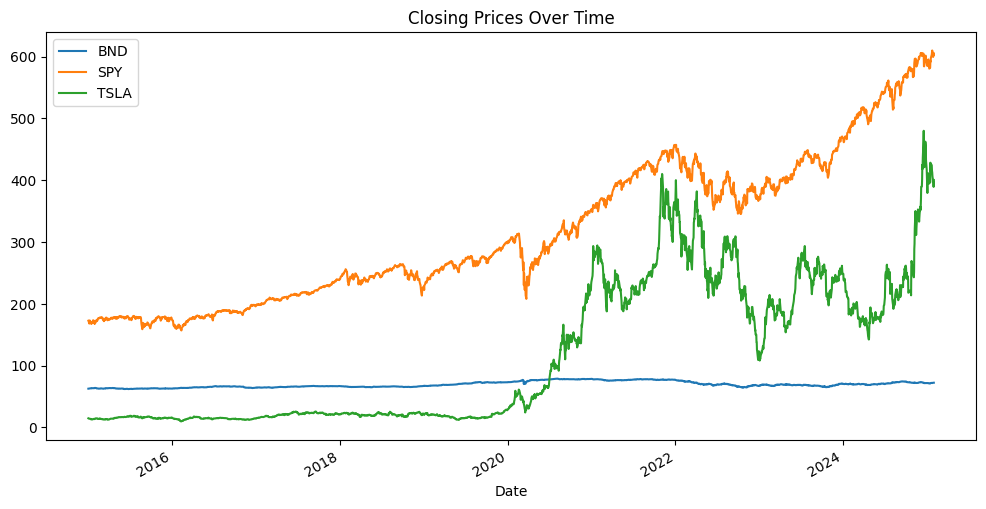

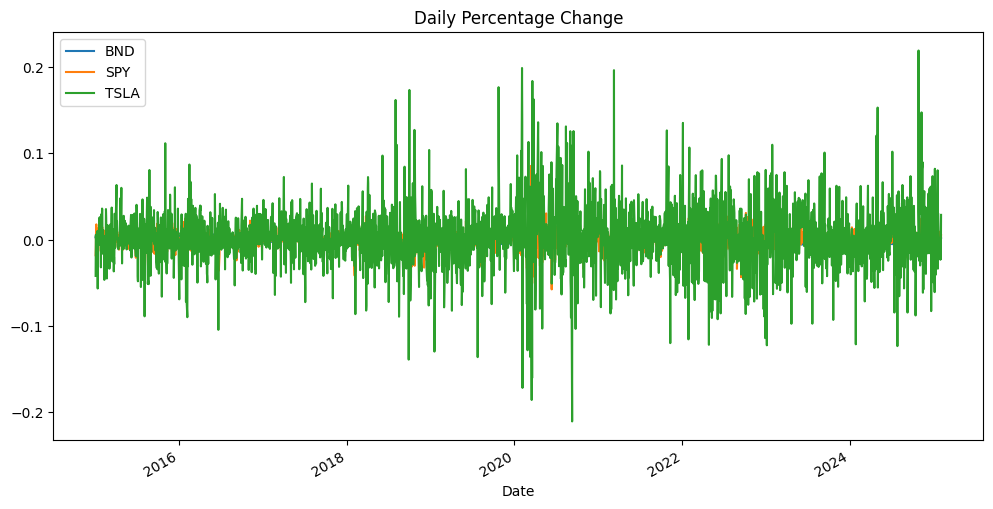

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(adj_close.describe())

# Plot closing prices
adj_close.plot(figsize=(12, 6), title="Closing Prices Over Time")
plt.show()

# Calculate daily percentage change
daily_returns = adj_close.pct_change()

# Plot daily returns
daily_returns.plot(figsize=(12, 6), title="Daily Percentage Change")
plt.show()

<Figure size 1200x800 with 0 Axes>

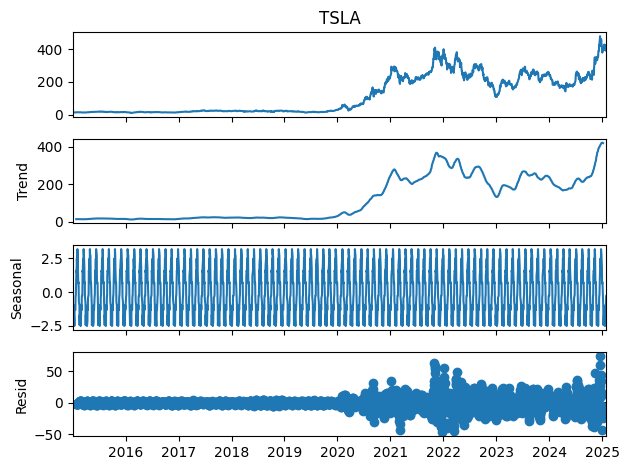

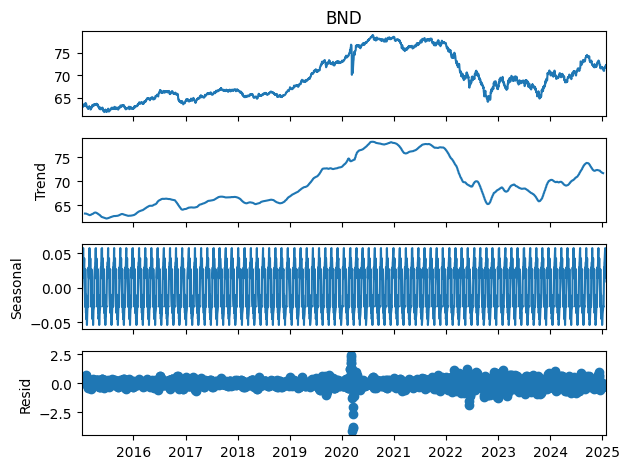

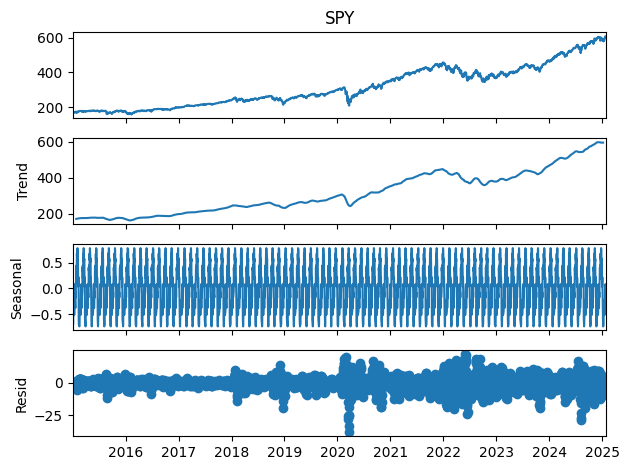

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose TSLA time series 'BND', 'SPY'
decomposition = seasonal_decompose(adj_close['TSLA'], model='additive', period=30)
decomposition1 = seasonal_decompose(adj_close['BND'], model='additive', period=30)
decomposition2 = seasonal_decompose(adj_close['SPY'], model='additive', period=30)

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
decomposition1.plot()
decomposition2.plot()
plt.show()

 # Task 2: Develop Time Series Forecasting Models

In [28]:
tsla_data = adj_close['TSLA']
tsla_data.head()

Date
2015-01-02    14.620667
2015-01-05    14.006000
2015-01-06    14.085333
2015-01-07    14.063333
2015-01-08    14.041333
Name: TSLA, dtype: float64

In [29]:
# Use an 80%-20% split for training and testing.
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data[:train_size], tsla_data[train_size:]

print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 2028
Testing set size: 507


#### Option 1: ARIMA (AutoRegressive Integrated Moving Average)

In [30]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(train)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Time series is non-stationary. Apply differencing.")
else:
    print("Time series is stationary.")

ADF Statistic: -1.3071175481635373
p-value: 0.6259097682416394
Time series is non-stationary. Apply differencing.


In [31]:
# Perform first-order differencing
diff_tsla = tsla_data.diff().dropna()

# Re-run the ADF test on the differenced data
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(diff_tsla)
print(f"ADF Statistic (after differencing): {result_diff[0]}")
print(f"p-value (after differencing): {result_diff[1]}")

if result_diff[1] <= 0.05:
    print("Time series is now stationary after differencing.")
else:
    print("Time series is still non-stationary. Consider further differencing or transformations.")

ADF Statistic (after differencing): -9.770527081408822
p-value (after differencing): 7.156438713878808e-17
Time series is now stationary after differencing.


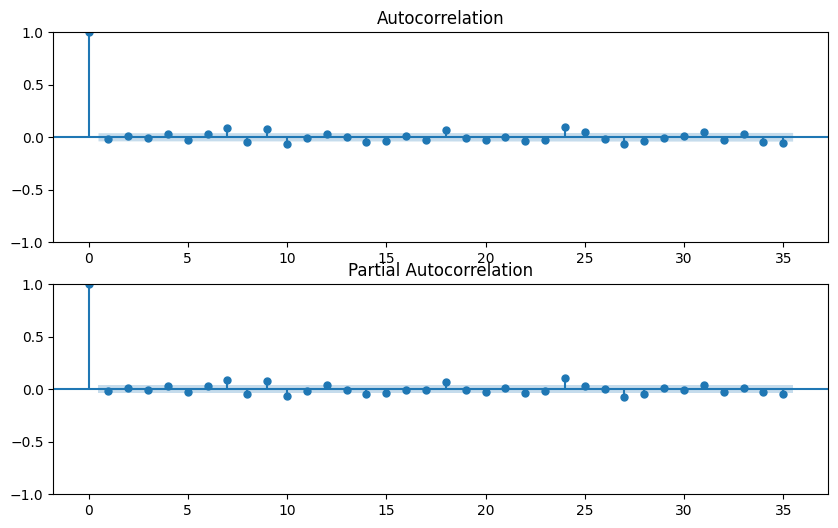

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(train, ax=axes[0])
plot_pacf(train, ax=axes[1])
plt.show()

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model
model = ARIMA(train, order=(4, 1, 5))  # Example parameters (p=4, d=1, q=2)
model_fit = model.fit()

print(model_fit.summary())

/home/adane/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/adane/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/adane/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2028
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -6307.829
Date:                Sun, 02 Mar 2025   AIC                          12635.658
Time:                        16:40:55   BIC                          12691.801
Sample:                             0   HQIC                         12656.258
                               - 2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3774      0.099    -24.097      0.000      -2.571      -2.184
ar.L2         -2.8134      0.201    -14.018      0.000      -3.207      -2.420
ar.L3         -1.7395      0.191     -9.124      0.0

/home/adane/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
# Forecast on test data
forecast = model_fit.forecast(steps=len(test))

# Compare with actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

NameError: name 'model_fit' is not defined